In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Displaying the data

In [2]:
read_data = pd.read_csv('D:/Downloads/gan_train.csv')
train = pd.read_csv('D:/Downloads/train_gan.csv')

In [3]:
train.drop('label', axis=1, inplace= True)

In [4]:
images = read_data.iloc[:,:].values
images = np.concatenate([images, train.iloc[:,:].values], axis = 0)
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

images(70000,784)


In [5]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


In [6]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)
    plt.show()

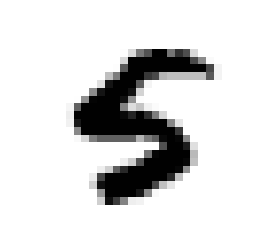

In [7]:
display(images[np.random.randint(40000), :])

# Defining TF Neural Net for Simple GAN

In [8]:
tf.reset_default_graph()
learning_rate = 0.0001

In [9]:
def sample_Z(size = [1,100]):
    """Samples from a normal distribution with mean 0.0 and standard deviation 1.0"""
    return np.random.normal(size = size)

In [10]:
Z_ph = tf.placeholder(tf.float32, shape = [None, 100])
image_ph = tf.placeholder(tf.float32, shape = [None, 784])

In [11]:
def generator(Z):
    with tf.variable_scope('generator'):
        hidden1 = tf.layers.dense(Z, 128)
        hidden1 = tf.maximum(hidden1, 0.01)
        #hidden2 = tf.layers.dense(hidden1, 256)
        #hidden2 = tf.maximum(hidden2, 0.01)
        logits = tf.layers.dense(hidden1, 784)
        output = (tf.nn.tanh(logits) + tf.ones_like(logits))/2
        return output

In [12]:
generator_sample = generator(Z_ph)

In [13]:
def discriminator(image, reuse = False):
    with tf.variable_scope('discriminator', reuse = reuse):
        hidden1 = tf.layers.dense(image, 128)
        hidden1 = tf.maximum(hidden1, 0.01)
        #hidden2 = tf.layers.dense(hidden1, 56)
        #hidden2 = tf.maximum(hidden2, 0.01)
        logits = tf.layers.dense(hidden1, 1)
        output = tf.nn.sigmoid(logits)
        return output

In [14]:
discriminator_score = discriminator(image_ph)
discriminator_new = discriminator(generator_sample, reuse = True)

In [15]:
adv_loss =-tf.reduce_mean(tf.log(discriminator_score) + tf.log(tf.ones_like(discriminator_new) - discriminator_new))

In [16]:
generator_loss = -tf.reduce_mean(tf.log(discriminator_new))

In [17]:
t_vars = tf.trainable_variables()
gen_vars = [var for var in t_vars if var.name.startswith('generator')]
adv_vars = [var for var in t_vars if var.name.startswith('discriminator')]

In [18]:
g_opt = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(generator_loss, var_list = gen_vars)
#g_opt = tf.train.AdamOptimizer(learning_rate).minimize(generator_loss, var_list = gen_vars)
d_opt = tf.train.MomentumOptimizer(learning_rate, 0.65).minimize(adv_loss, var_list = adv_vars)
#d_opt = tf.train.AdamOptimizer(learning_rate).minimize(adv_loss, var_list = adv_vars)

# Running GAN with minibatch

In [19]:
minibatch_size = 280

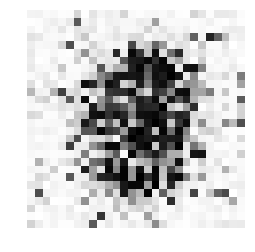

Discriminator Loss: 0.11169347912073135, Generator Loss: 3.8690555095672607, Epoch: 0


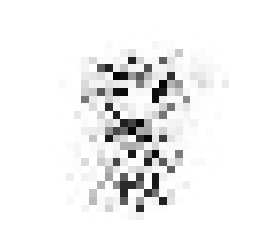

Discriminator Loss: 0.23360660672187805, Generator Loss: 2.2184722423553467, Epoch: 10


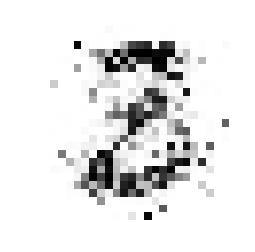

Discriminator Loss: 0.6223292946815491, Generator Loss: 1.8038957118988037, Epoch: 20


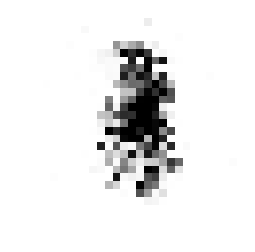

Discriminator Loss: 0.39286383986473083, Generator Loss: 2.100182056427002, Epoch: 30


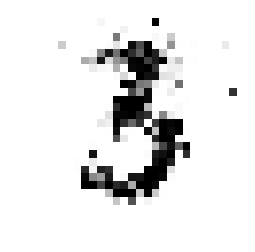

Discriminator Loss: 0.4118043780326843, Generator Loss: 2.268998384475708, Epoch: 40


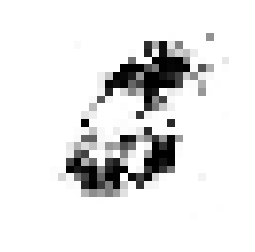

Discriminator Loss: 0.520672082901001, Generator Loss: 2.1924619674682617, Epoch: 50


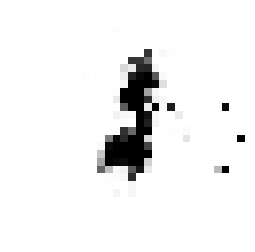

Discriminator Loss: 0.44551920890808105, Generator Loss: 2.4850306510925293, Epoch: 60


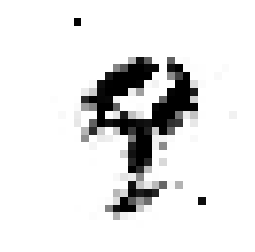

Discriminator Loss: 0.3726477026939392, Generator Loss: 2.5076406002044678, Epoch: 70


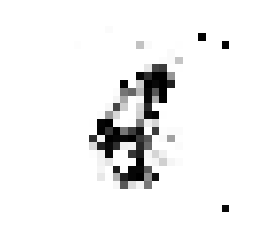

Discriminator Loss: 0.43696892261505127, Generator Loss: 2.481719732284546, Epoch: 80


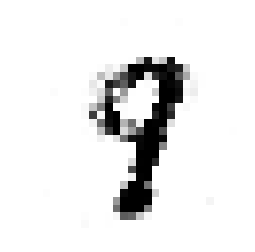

Discriminator Loss: 0.501742959022522, Generator Loss: 2.2276272773742676, Epoch: 90


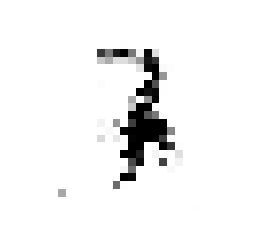

Discriminator Loss: 0.48853808641433716, Generator Loss: 2.5667808055877686, Epoch: 100


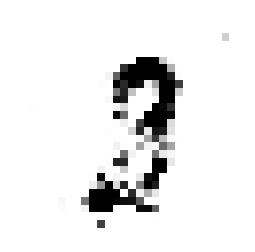

Discriminator Loss: 0.45927077531814575, Generator Loss: 2.7530715465545654, Epoch: 110


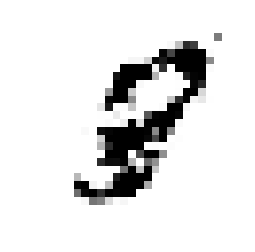

Discriminator Loss: 0.45516979694366455, Generator Loss: 2.5310168266296387, Epoch: 120


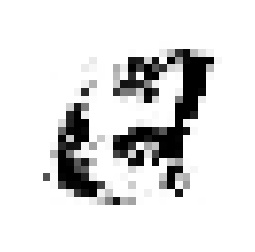

Discriminator Loss: 0.5160583257675171, Generator Loss: 2.3880624771118164, Epoch: 130


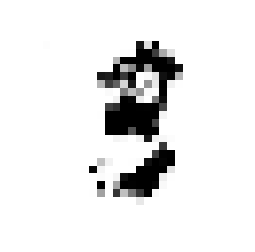

Discriminator Loss: 0.5768166780471802, Generator Loss: 2.4593496322631836, Epoch: 140


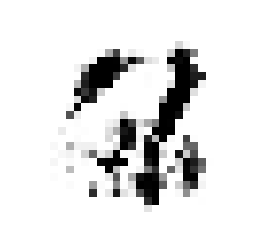

Discriminator Loss: 0.5466793775558472, Generator Loss: 2.3802669048309326, Epoch: 150


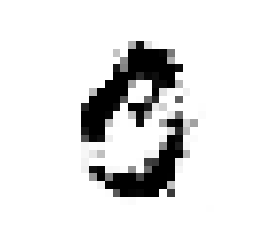

Discriminator Loss: 0.5055685639381409, Generator Loss: 2.362058639526367, Epoch: 160


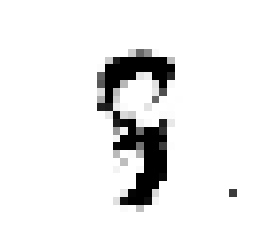

Discriminator Loss: 0.5471633076667786, Generator Loss: 2.3601770401000977, Epoch: 170


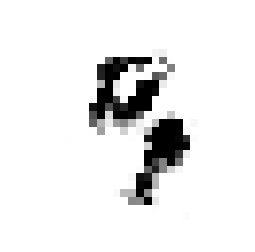

Discriminator Loss: 0.507755696773529, Generator Loss: 2.402207612991333, Epoch: 180


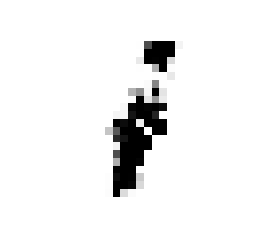

Discriminator Loss: 0.5739677548408508, Generator Loss: 2.213806629180908, Epoch: 190


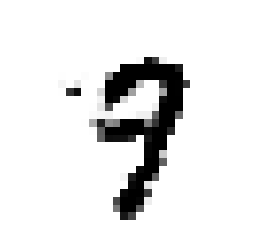

Discriminator Loss: 0.5905115604400635, Generator Loss: 2.257833957672119, Epoch: 200


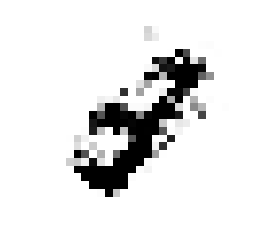

Discriminator Loss: 0.6826033592224121, Generator Loss: 1.9734110832214355, Epoch: 210


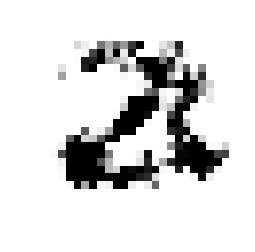

Discriminator Loss: 0.6140155792236328, Generator Loss: 2.3046536445617676, Epoch: 220


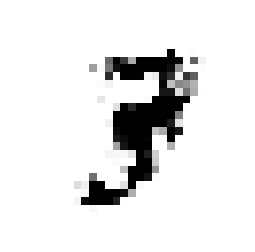

Discriminator Loss: 0.6650065183639526, Generator Loss: 2.2256669998168945, Epoch: 230


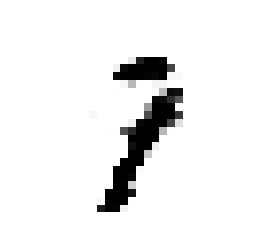

Discriminator Loss: 0.6474036574363708, Generator Loss: 2.0496554374694824, Epoch: 240


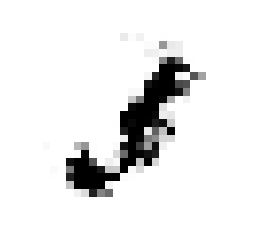

Discriminator Loss: 0.6811603903770447, Generator Loss: 1.9774829149246216, Epoch: 250


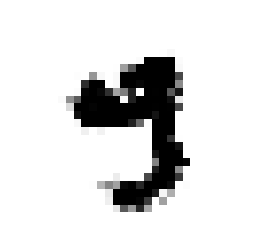

Discriminator Loss: 0.7057057023048401, Generator Loss: 2.1228604316711426, Epoch: 260


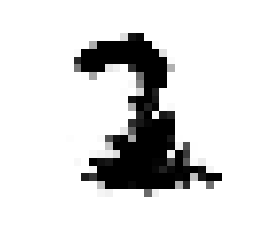

Discriminator Loss: 0.6566061973571777, Generator Loss: 2.112285852432251, Epoch: 270


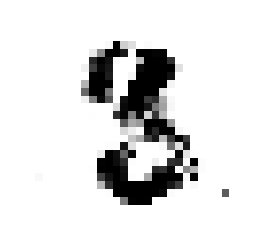

Discriminator Loss: 0.7165329456329346, Generator Loss: 2.118124008178711, Epoch: 280


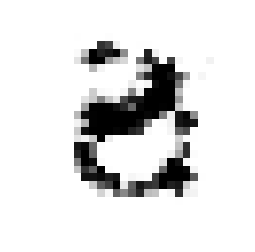

Discriminator Loss: 0.6744387745857239, Generator Loss: 2.063246250152588, Epoch: 290


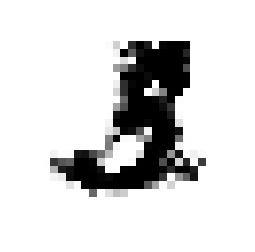

Discriminator Loss: 0.7187030911445618, Generator Loss: 2.0441370010375977, Epoch: 300


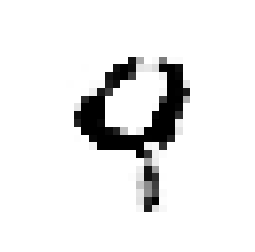

Discriminator Loss: 0.7432641983032227, Generator Loss: 1.929858684539795, Epoch: 310


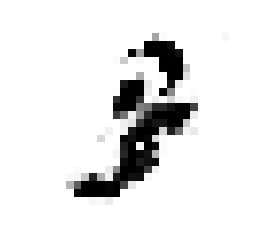

Discriminator Loss: 0.7749039530754089, Generator Loss: 2.171497106552124, Epoch: 320


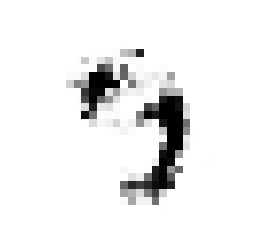

Discriminator Loss: 0.6715031266212463, Generator Loss: 2.1133031845092773, Epoch: 330


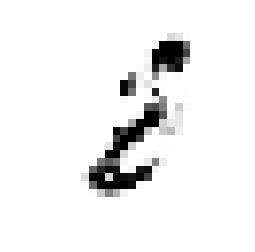

Discriminator Loss: 0.7483964562416077, Generator Loss: 2.0666098594665527, Epoch: 340


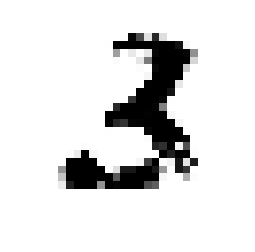

Discriminator Loss: 0.733761727809906, Generator Loss: 2.1233768463134766, Epoch: 350


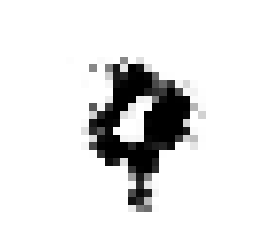

Discriminator Loss: 0.714165449142456, Generator Loss: 2.118252754211426, Epoch: 360


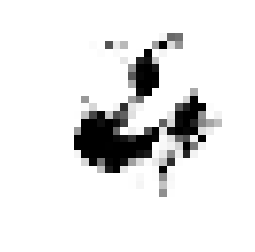

Discriminator Loss: 0.6730082035064697, Generator Loss: 2.2314140796661377, Epoch: 370


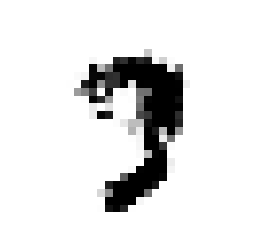

Discriminator Loss: 0.6810013055801392, Generator Loss: 2.0500190258026123, Epoch: 380


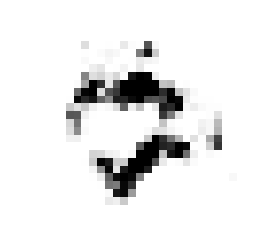

Discriminator Loss: 0.680320143699646, Generator Loss: 1.8597753047943115, Epoch: 390


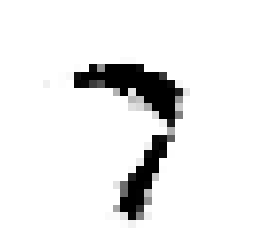

Discriminator Loss: 0.686935305595398, Generator Loss: 2.124013662338257, Epoch: 400


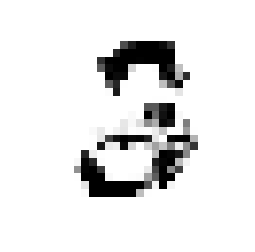

Discriminator Loss: 0.7354045510292053, Generator Loss: 2.231640577316284, Epoch: 410


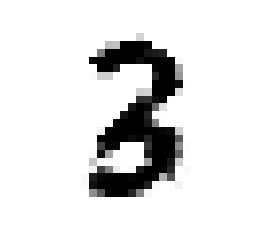

Discriminator Loss: 0.7438886165618896, Generator Loss: 2.105820655822754, Epoch: 420


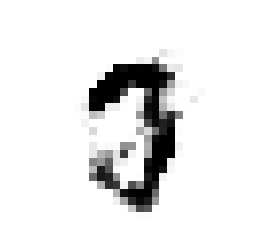

Discriminator Loss: 0.7312271595001221, Generator Loss: 1.9853819608688354, Epoch: 430


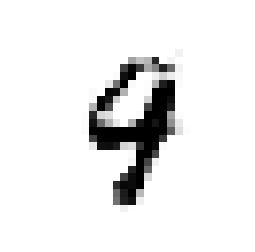

Discriminator Loss: 0.7666794657707214, Generator Loss: 2.0500364303588867, Epoch: 440


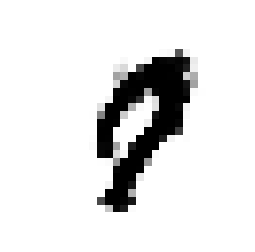

Discriminator Loss: 0.7580248713493347, Generator Loss: 2.0225656032562256, Epoch: 450


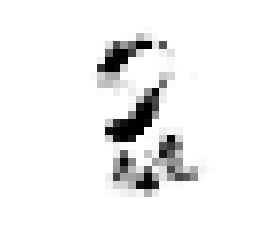

Discriminator Loss: 0.7377585172653198, Generator Loss: 2.107931137084961, Epoch: 460


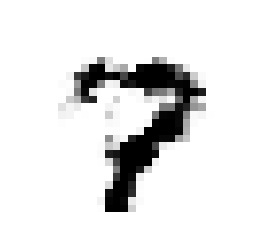

Discriminator Loss: 0.7933766841888428, Generator Loss: 2.0435051918029785, Epoch: 470


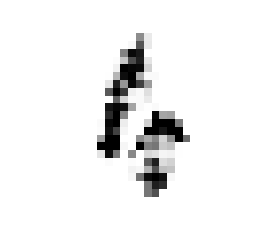

Discriminator Loss: 0.7034608125686646, Generator Loss: 2.077692985534668, Epoch: 480


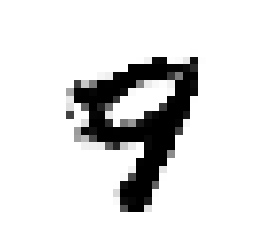

Discriminator Loss: 0.7826544642448425, Generator Loss: 2.013528823852539, Epoch: 490


In [20]:
images_generated = []
X = images
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for ep in range(500):
        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            
            _ = sess.run(d_opt, feed_dict = {Z_ph: sample_Z(size = [minibatch_size,100]), image_ph: X_mini})
            _ = sess.run(g_opt, feed_dict = {Z_ph: sample_Z(size = [minibatch_size,100])})

            d_losses = sess.run(adv_loss, feed_dict = {Z_ph: sample_Z(size = [minibatch_size,100]), image_ph: X_mini})

            g_losses = sess.run(generator_loss, feed_dict = {Z_ph: sample_Z(size = [minibatch_size,100])})

            sample_img = sess.run(generator_sample, feed_dict = {Z_ph:sample_Z()})
            images_generated.append(sample_img)
        if ep%10 == 0:
            display(sample_img)
            print('Discriminator Loss: {}, Generator Loss: {}, Epoch: {}'.format(d_losses, g_losses, ep))